# GitHub UA statistic

Basic stats of Ukrainian GitHub users. Information neither full nor representative

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine

In [87]:
password = 'XXXXXXXX'

In [88]:
engine = create_engine('mysql+mysqlconnector://root:{}@localhost:3306/github'.format(password), echo=False)

In [89]:
df = pd.read_sql('SELECT * FROM users_ukr', engine).set_index('id')

Raw data from my DB

In [90]:
df.head()

,parsed,login,name,email,location,bio,followers,following,public_repos,public_gists,company,blog,created_at,updated_at,hireable,type,site_admin,github_id,node_id
id,,,,,,,,,,,,,,,,,,,
48,1,inayelle-arts,inayelle_arts,None,Ukraine,universal keklol developer,7,0,22,0,None,qwe,2015-11-26T14:36:38Z,2018-06-09T14:56:42Z,None,User,0,None,MDQ6VXNlcjE2MDM0NDcw
163,1,AlexeyBatin,Alexey,None,Kiev,KPI student,4,5,7,1,None,,2016-11-06T19:05:02Z,2018-06-06T11:06:10Z,None,User,0,None,MDQ6VXNlcjIzMjk4MzY0
164,1,ArtAleksey,Oleksiy,None,"Kyiv, Ukraine",programming<3,2,4,3,0,None,,2017-11-09T21:44:07Z,2018-04-15T15:22:15Z,None,User,0,None,MDQ6VXNlcjMzNTMwMTYx
165,1,OlhaPokhvalenna,Olha Pokhvalenna,None,"Kiev, Ukraine",Using things I don't need.,6,7,5,0,None,,2017-10-04T13:18:16Z,2018-06-03T17:21:10Z,None,User,0,None,MDQ6VXNlcjMyNTE1Njg3
166,1,oxyyyyy,Alexandr Vlasenko,olexandr.vlasenko@gmail.com,Kiev,"Front-end developer.\r\nUkraine, Kiev.\r\n\r\n...",6,8,39,5,Pro Group Consult,http://a-vlasenko.zzz.com.ua/,2016-02-18T17:57:36Z,2018-05-11T17:48:24Z,1,User,0,None,MDQ6VXNlcjE3MzIwODE2


Simple cleaning

In [91]:
df.drop(['parsed', 'type', 'site_admin', 'github_id', 'node_id'], axis=1, inplace=True)

In [92]:
df['hireable'].fillna(0, inplace=True)

In [93]:
df['hireable'] = df['hireable'].astype('int64')

Description of numerical data

In [94]:
df.describe()

,followers,following,public_repos,public_gists,hireable
count,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000
mean,11.285080,12.583047,17.220647,4.028637,0.270762
std,44.575307,93.111744,29.190660,14.632479,0.444385
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,5.000000,0.000000,0.000000
50%,4.000000,4.000000,10.000000,0.000000,0.000000
75%,9.000000,10.000000,20.000000,3.000000,1.000000
max,2112.000000,6037.000000,1276.000000,550.000000,1.000000


Description of text/categorical data

In [95]:
df.drop(['created_at', 'updated_at'], axis=1).describe(exclude = np.number)

,login,name,email,location,bio,company,blog
count,6984,6765,3370,6984,1952,2663,6984
unique,6984,5709,3368,469,1716,1901,2197
top,vodrems,Alex,zminyty@gmail.com,Ukraine,Front-end developer,SoftServe,
freq,1,43,2,1701,23,40,4762


Account with max following

https://github.com/ujinius

In [96]:
df.loc[df.following.idxmax()]

login                                                     ujinius
name                                              Eugene Zaretsky
email                                           eugene@agilie.com
location                                  Ukraine, Dnipropetrovsk
bio             R&D Engineer, Web/Server department team lead ...
followers                                                      65
following                                                    6037
public_repos                                                    1
public_gists                                                    0
company                                                  @agilie 
blog                                           https://agilie.com
created_at                                   2013-02-28T19:32:20Z
updated_at                                   2018-05-12T04:13:48Z
hireable                                                        0
Name: 7838, dtype: object

Account with max followers

https://github.com/mourner

In [97]:
df.loc[df.followers.idxmax()]

login                                                     mourner
name                                           Vladimir Agafonkin
email                                         agafonkin@gmail.com
location                                            Kyiv, Ukraine
bio             Engineer at @Mapbox, building mapping tools of...
followers                                                    2112
following                                                     239
public_repos                                                   59
public_gists                                                   54
company                                                    Mapbox
blog                                      http://agafonkin.com/en
created_at                                   2008-09-19T16:52:39Z
updated_at                                   2018-06-10T04:09:40Z
hireable                                                        0
Name: 287, dtype: object

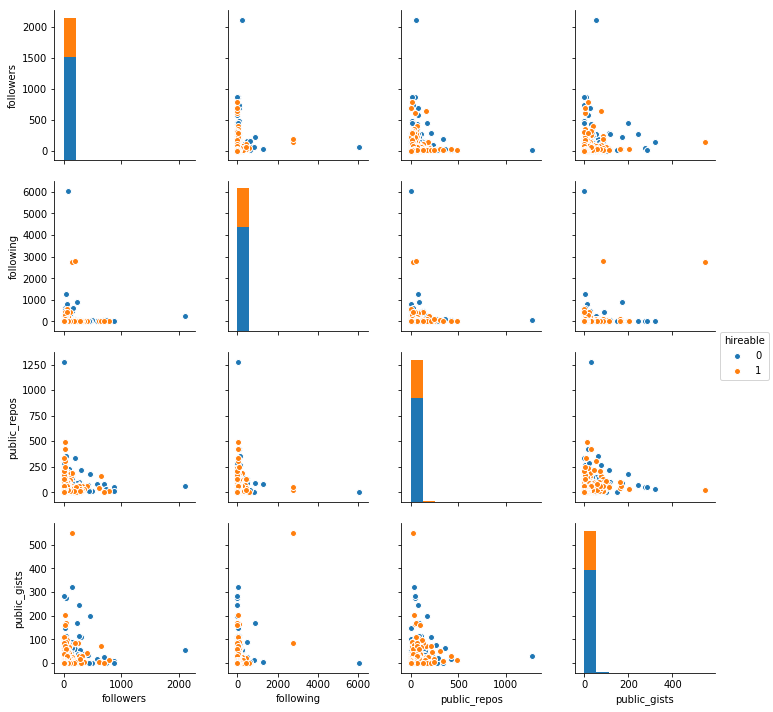

In [98]:
sns.pairplot(df, vars=["followers", "following", "public_repos", "public_gists"], hue='hireable');